In [2]:

import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import importlib.util
import sympy as sp
from grp import struct_group
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

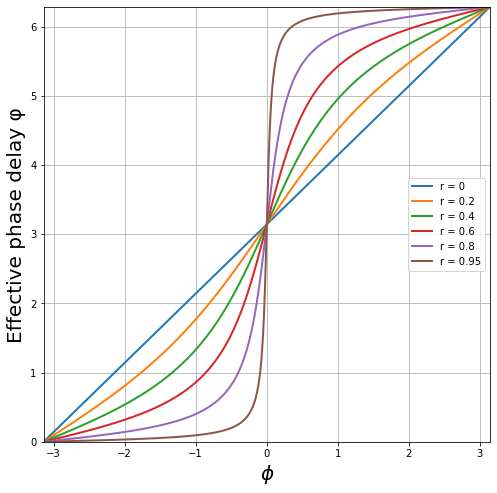

In [2]:

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
figure1 = plt.figure(figsize=(8, 8))

a=1 #zero attenuation
phi = np.linspace(-np.pi,np.pi, 1000)
r = [0, 0.2, 0.4, 0.6, 0.8, 0.95]

for i in range(0,len(r)):

    phi_eff = np.pi + phi + np.arctan(r[i]*np.sin(phi)/(a-r[i]*np.cos(phi))) + np.arctan(r[i]*a*np.sin(phi)/(1-r[i]*a*np.cos(phi)))
    plt.plot(phi,phi_eff, label='r = '+str(r[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

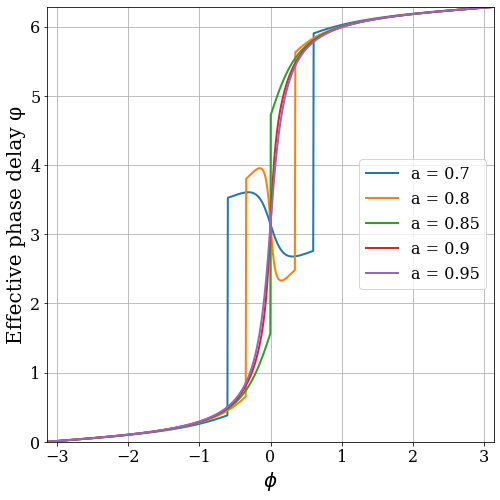

In [3]:
figure2 = plt.figure(figsize=(8, 8))
plt.rc('font', **font)
r = 0.85
a = [ 0.7, 0.8, 0.85, 0.9, 0.95]
phi = np.linspace(-np.pi,np.pi, 1000)

for i in range(0, len(a)):
    phi_eff = np.pi + phi + np.arctan(r*np.sin(phi)/(a[i]-r*np.cos(phi))) + np.arctan(r*a[i]*np.sin(phi)/(1-r*a[i]*np.cos(phi)))
    plt.plot(phi,phi_eff, label='a = '+str(a[i]), linewidth=2)
    plt.grid(True)
    plt.xlim([-np.pi,np.pi])
    plt.ylim([0, 2*np.pi])
    plt.ylabel('Effective phase delay '+ 'φ', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='center right')

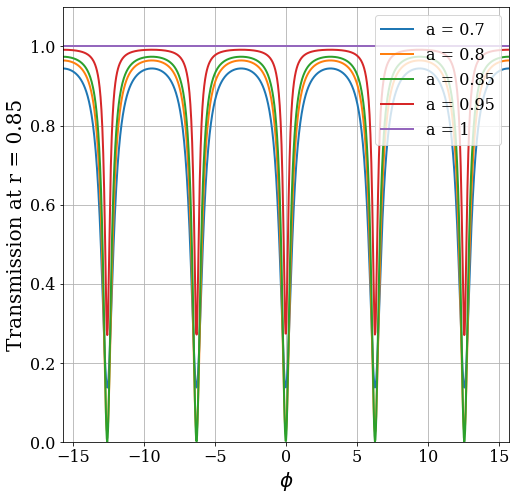

In [4]:
figure3 = plt.figure(figsize=(8, 8))
r = 0.85
a = [ 0.7,0.8,0.85, 0.95, 1]
phi = np.linspace(-5*np.pi,5*np.pi, 1000)
for i in range(0, len(a)):
    T = (a[i]**2 - 2*r*a[i]*np.cos(phi) + (r)**2)/(1 - 2*a[i]*r*np.cos(phi) + (r*a[i])**2)
    plt.plot(phi, T, label= 'a = ' + str(a[i]), linewidth = 2)
    plt.grid(True)
    plt.xlim([-5*np.pi,5*np.pi])
    plt.ylim([0, 1.1])
    plt.ylabel('Transmission at r = 0.85', size = '20')
    plt.xlabel('$\phi$', size = 20)
    plt.legend(loc='upper right')

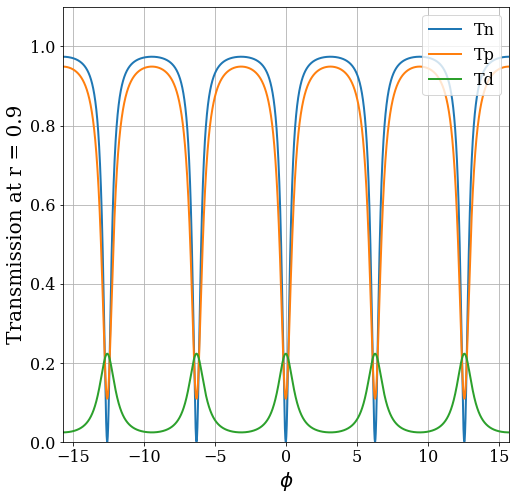

In [5]:
figure3 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.85

a = 0.85
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [3]:
c = 299792458
lambd = 1550e-9 
ng = 4.622
FSR = (25.6/3)*1e-9
FWHM = lambd**2*(100e9)/c
L = lambd**2/(ng*FSR)
Q = lambd/FWHM
radius = L/(2*np.pi)
delta_n = 1.98577 - 1.876785
T11 = np.sqrt(((ng*L*np.pi)/(2*Q*lambd))**2 + 1) - (ng*L*np.pi)/(2*Q*lambd)
T12 = np.sqrt(1-T11**2)
Lc = lambd/(np.pi*delta_n)*np.arcsin(T12)
print(radius)
print(Lc)
print(L)
print(Q)
print(FWHM)
print(FSR)

9.69471120063382e-06
2.394876705831968e-06
6.0913666973171785e-05
1934.1448903225807
8.013877387135603e-10
8.533333333333334e-09


In [4]:
b = (FWHM*np.pi*ng*L)**2/(lambd**4)
result_ = np.roots([1,-(2+b),1])
coeff = np.sqrt(result_)
print(result_)
10*np.log10(result_)

[1.34175102 0.74529476]


array([ 1.27671935, -1.27671935])

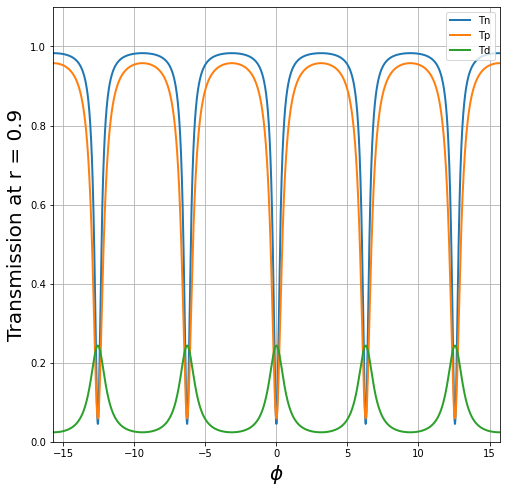

In [5]:
figure4 = plt.figure(figsize=(8, 8))
r1= 0.9
r2 = 0.9
r = 0.85

a = 0.9
phi = np.linspace(-5*np.pi,5*np.pi, 10000)

T_n = (a**2 - 2*r*a*np.cos(phi) + (r)**2)/(1 - 2*a*r*np.cos(phi) + (r*a)**2)
T_p = ((r*a)**2 - 2*r**2*a*np.cos(phi) + r**2)/(1 - 2*r**2*a*np.cos(phi)+(r**2*a)**2)
T_d = (1-r**2)*(1-r**2)*a/(1 - 2*r**2*a*np.cos(phi)+(r*a)**2)
plt.plot(phi, T_n, label= 'Tn', linewidth = 2)
plt.plot(phi, T_p, label= 'Tp', linewidth = 2)
plt.plot(phi, T_d, label= 'Td', linewidth = 2)
plt.grid(True)
plt.xlim([-5*np.pi,5*np.pi])
plt.ylim([0, 1.1])
plt.ylabel('Transmission at r = 0.9', size = '20')
plt.xlabel('$\phi$', size = 20)
plt.legend(loc='upper right')

In [6]:
fdtd =lumapi.FDTD(filename= 'halfring_straight.fsp')

In [7]:
def RectInsert(X,XSPAN,Y,YSPAN,Z,ZSPAN,MATERIAL,lumerical):
    lumerical.set("x",X)
    lumerical.set("x span",XSPAN)
    lumerical.set("y",Y)
    lumerical.set("y span",YSPAN)
    lumerical.set("z",Z)
    lumerical.set("z span", ZSPAN)
    lumerical.set("material",MATERIAL)
    



In [17]:
fdtd.switchtolayout()
fdtd.selectall()
fdtd.delete()

radius = 6e-6
gap = 0.15e-6
Lc = 0e-6
len = 30e-6

fdtd.addobject("ring_resonator")
fdtd.setnamed("ring resonator::outer_bottom",'enabled',0)
fdtd.setnamed("ring resonator::inner_bottom",'enabled',0)
fdtd.setnamed("ring resonator::arc2",'enabled',0)
fdtd.setnamed("ring resonator::arc3",'enabled',0)

fdtd.select("ring resonator")
fdtd.set({"x":0,
"y":0,
"z":0,
"Lc":Lc,
"gap":gap,
"radius":radius,
"base width":0.4e-6,
"base height":0.18e-6,
"x span":len,
"material":"Si (Silicon) - Palik Copy 1"})

In [18]:
fdtd.switchtolayout()
fdtd.select("rect_right")
fdtd.delete()
fdtd.select("rect_left")
fdtd.delete()

x_right_rect = (len/2 + Lc/2 + radius)
x_right_rect_span = 0.4e-6
y_right_rect_span = 4e-6
y_right_rect = -y_right_rect_span/2

x_left_rect = len/2 - Lc/2 - radius
x_left_rect_span = 0.4e-6
y_left_rect_span = 4e-6
y_left_rect = -y_left_rect_span/2

fdtd.addrect()
fdtd.set({"x":x_right_rect,
"x span":x_right_rect_span,
"y":y_right_rect,
"y span":y_right_rect_span,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik Copy 1",
"name":"rect_right"})

fdtd.addrect()
fdtd.set({"x":x_left_rect,
"x span":x_left_rect_span,
"y":y_left_rect,
"y span":y_left_rect_span,
"z":0,
"z span":0.18e-6,
"material":"Si (Silicon) - Palik Copy 1",
"name":"rect_left"})


In [29]:
fdtd.switchtolayout()
fdtd.select("FDTD")
fdtd.delete()

fdtd.addfdtd()
fdtd.set({"x":len/2,
"x span":Lc + 2*radius + 4e-6,
"y min":-y_right_rect_span/2 -0.75e-6,
"y max":radius + 0.4e-6 + gap + 3e-6,
"z":0,
"z span":3e-6,
"z min bc":"Symmetric",
"background material":"SiO2 (Glass) - Palik Copy 1",
"mesh accuracy":4,
"dt stability factor":0.95,
"simulation time":3000e-15
})

fdtd.addprofile()
fdtd.setnamed("monitor","x",len/2)
fdtd.setnamed("monitor","x span",Lc + 2*radius + 4e-6)
fdtd.setnamed("monitor","y min",-y_right_rect_span/2 -0.75e-6)
fdtd.setnamed("monitor","y max",radius + 0.4e-6 + gap + 3e-6)

fdtd.addport()
fdtd.set({"x":len/2 - Lc/2 - radius - 1e-6,
"y":radius + gap + 0.4e-6,
"y span":4e-6,
"z":0,
"z span":3e-6})

fdtd.addport()
fdtd.set({"x":len/2 + Lc/2 + radius + 1e-6,
"y":radius + gap + 0.4e-6,
"y span":4e-6,
"z":0,
"z span":3e-6,
"direction":"Backward"})

fdtd.addport()
fdtd.set({"x":x_left_rect,
"y":y_left_rect,
"x span":4e-6,
"z":0,
"z span":3e-6,
"injection axis":"y-axis",
"direction":"Forward"})

fdtd.addport()
fdtd.set({"x":x_right_rect,
"y":y_right_rect,
"x span":4e-6,
"z":0,
"z span":3e-6,
"injection axis":"y-axis",
"direction":"Forward"})

fdtd.select("FDTD::ports")
fdtd.set({"monitor frequency points":25})
fdtd.setglobalsource("wavelength start",1.5e-6)
fdtd.setglobalsource("wavelength stop", 1.6e-6)

1.0

In [80]:
number_of_points = 3
lc = np.linspace(0,2e-6,number_of_points)

fdtd.addsweep()
fdtd.setsweep("sweep", "name", "lc_sweep")
fdtd.setsweep("lc_sweep", "type", "values")
fdtd.setsweep("lc_sweep", "number of points", number_of_points)

1.0

In [81]:
fdtd.setnamed("FDTD::ports::port 3","enabled",0)
fdtd.setnamed("FDTD::ports::port 4","enabled",0)
fdtd.setnamed("FDTD","y min",-y_left_rect_span/2 + 1.5e-6)

para = {"Name":"Lc",
"Parameter":"::model::ring resonator::Lc",
"Type":"Length"}

for k in range(number_of_points):
    para.update({"value_" + str(k+1):lc[k]})

fdtd.addsweepparameter("lc_sweep", para)

Result = {"Name":"T",
"Result":"::model::FDTD::ports::port 2::T"}

fdtd.addsweepresult("lc_sweep", Result)

'T'

In [82]:
x_right = len/2 + lc/2 + radius
x_left = len/2 -lc/2 - radius
x_span_fdtd = lc + 2*radius + 4e-6
x_port1 = len/2 - lc/2 - radius - 1e-6
x_port2 = len/2 + lc/2 + radius + 1e-6

para_xr = {"Name":"xr",
"Parameter":"::model::rect_right::x",
"Type":"Length"}

para_xl = {"Name":"xl",
"Parameter":"::model::rect_left::x",
"Type":"Length"}

para_xspan_fdtd = {"Name":"x_span_fdtd",
"Parameter":"::model::FDTD::x span",
"Type":"Length"}

para_xport1 = {"Name":"x_port1",
"Parameter":"::model::FDTD::ports::port 1::x",
"Type":"Length"}

para_xport2 = {"Name":"x_port2",
"Parameter":"::model::FDTD::ports::port 2::x",
"Type":"Length"}

for k in range(number_of_points):
    para_xr.update({"value_" + str(k+1):x_right[k]})
    para_xl.update({"value_" + str(k+1):x_left[k]})
    para_xspan_fdtd.update({"value_" + str(k+1):x_span_fdtd[k]})
    para_xport1.update({"value_" + str(k+1):x_port1[k]})
    para_xport2.update({"value_" + str(k+1):x_port2[k]})
    
fdtd.addsweepparameter("lc_sweep", para_xr)
fdtd.addsweepparameter("lc_sweep", para_xl)
fdtd.addsweepparameter("lc_sweep", para_xspan_fdtd)
fdtd.addsweepparameter("lc_sweep", para_xport1)
fdtd.addsweepparameter("lc_sweep", para_xport2)

'x_port2'

In [83]:
fdtd.runsweep("lc_sweep")
T = fdtd.getsweepresult("lc_sweep", "T")

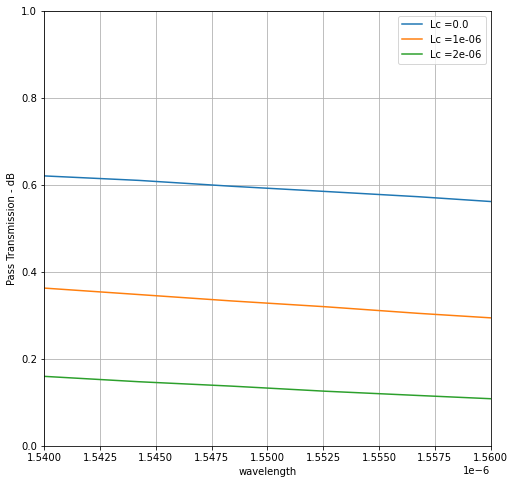

In [88]:
figure5 = plt.figure(figsize=(8, 8))

LC = T['Lc']
wavelength = T['lambda']
a = T['T']

for i in range (0,number_of_points):
    plt.plot(wavelength,((a[:,i])**2), label = "Lc =" + str(str(LC[0,i])))
    plt.grid(True)
    plt.xlabel("wavelength")
    plt.ylabel("Pass Transmission - dB")
    plt.legend(loc = "upper right")
    plt.ylim([0, 1])
    plt.xlim([1.54e-6,1.56e-6])
    

In [15]:
number_of_points = 3
lc = np.linspace(0,2e-6,number_of_points)

fdtd.addsweep()
fdtd.setsweep("sweep", "name", "lc_sweep")
fdtd.setsweep("lc_sweep", "type", "values")
fdtd.setsweep("lc_sweep", "number of points", number_of_points)

teste
